# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---



## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

''' old data loading of train & test data
training_file = '../../CarND-TrafficSigns-P2-master/data/train.p'
testing_file = '../../CarND-TrafficSigns-P2-master/data/test.p'
'''

# get the 3 data files
training_file = '../../CarND-TrafficSigns-P2-master/train.p'
validation_file = '../../CarND-TrafficSigns-P2-master/valid.p'
testing_file = '../../CarND-TrafficSigns-P2-master/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']  # comment out if no pre-made validation
X_test, y_test = test['features'], test['labels']

In [3]:
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
import random
import numpy as np

# DONE: Number of training examples
n_train = len(y_train)

# DONE: Number of testing examples.
n_test = len(y_test)

# DONE: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# DONE: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_test, return_index=False).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples = {}".format(len(y_valid)))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Look at the sign names & class labels
targets = pd.read_csv('signnames.csv')
display(targets[:12])

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing



### Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

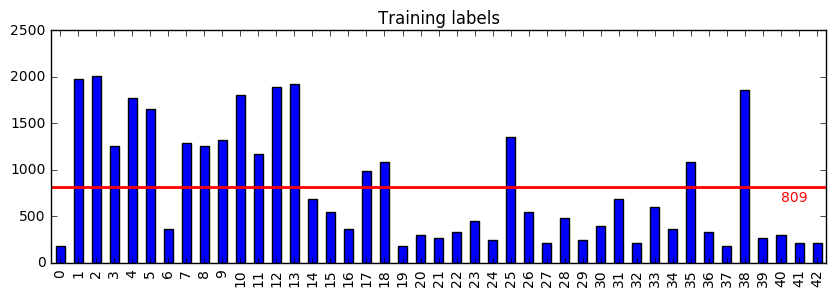

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# histograms of training, validation, test data
plt.figure(figsize=(10,3))
pd.Series(y_train).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_train)/43, linewidth=2, color='r')
bal = int(y_train.shape[0]/43)
plt.text(40,bal-150, str(bal), color='r')
plt.title('Training labels');

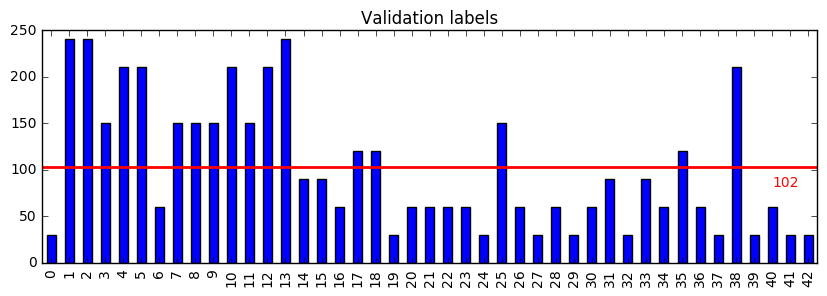

In [22]:
plt.figure(figsize=(10,3))
pd.Series(y_valid).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_valid)/43, linewidth=2, color='r')
bal = int(y_valid.shape[0]/43)
plt.text(40,bal-20, str(bal), color='r')
plt.title('Validation labels');

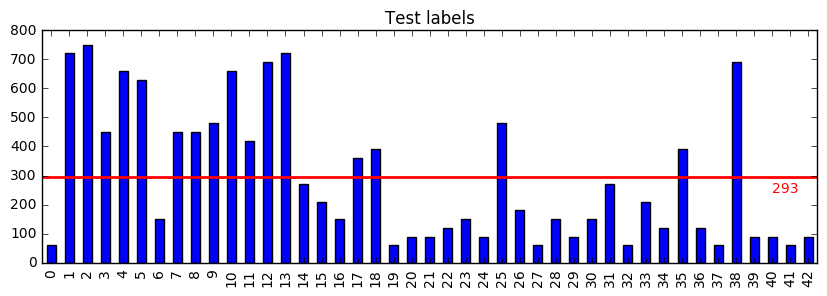

In [8]:
plt.figure(figsize=(10,3))
pd.Series(y_test).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_test)/43, linewidth=2, color='r')
bal = int(y_test.shape[0]/43)
plt.text(40,bal-50, str(bal), color='r')
plt.title('Test labels');

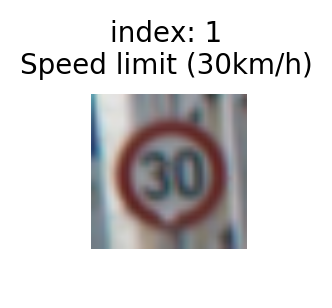

In [9]:
# Look at a random image
i = random.randint(0, len(X_train))
image = X_train[i].squeeze()

plt.rcParams['savefig.dpi']=200.
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.figtext(.5, 1, 'index: ' + str(y_train[i]) + '\n{}'.format(targets.SignName[y_train[i]]), ha='center')
plt.axis('off');

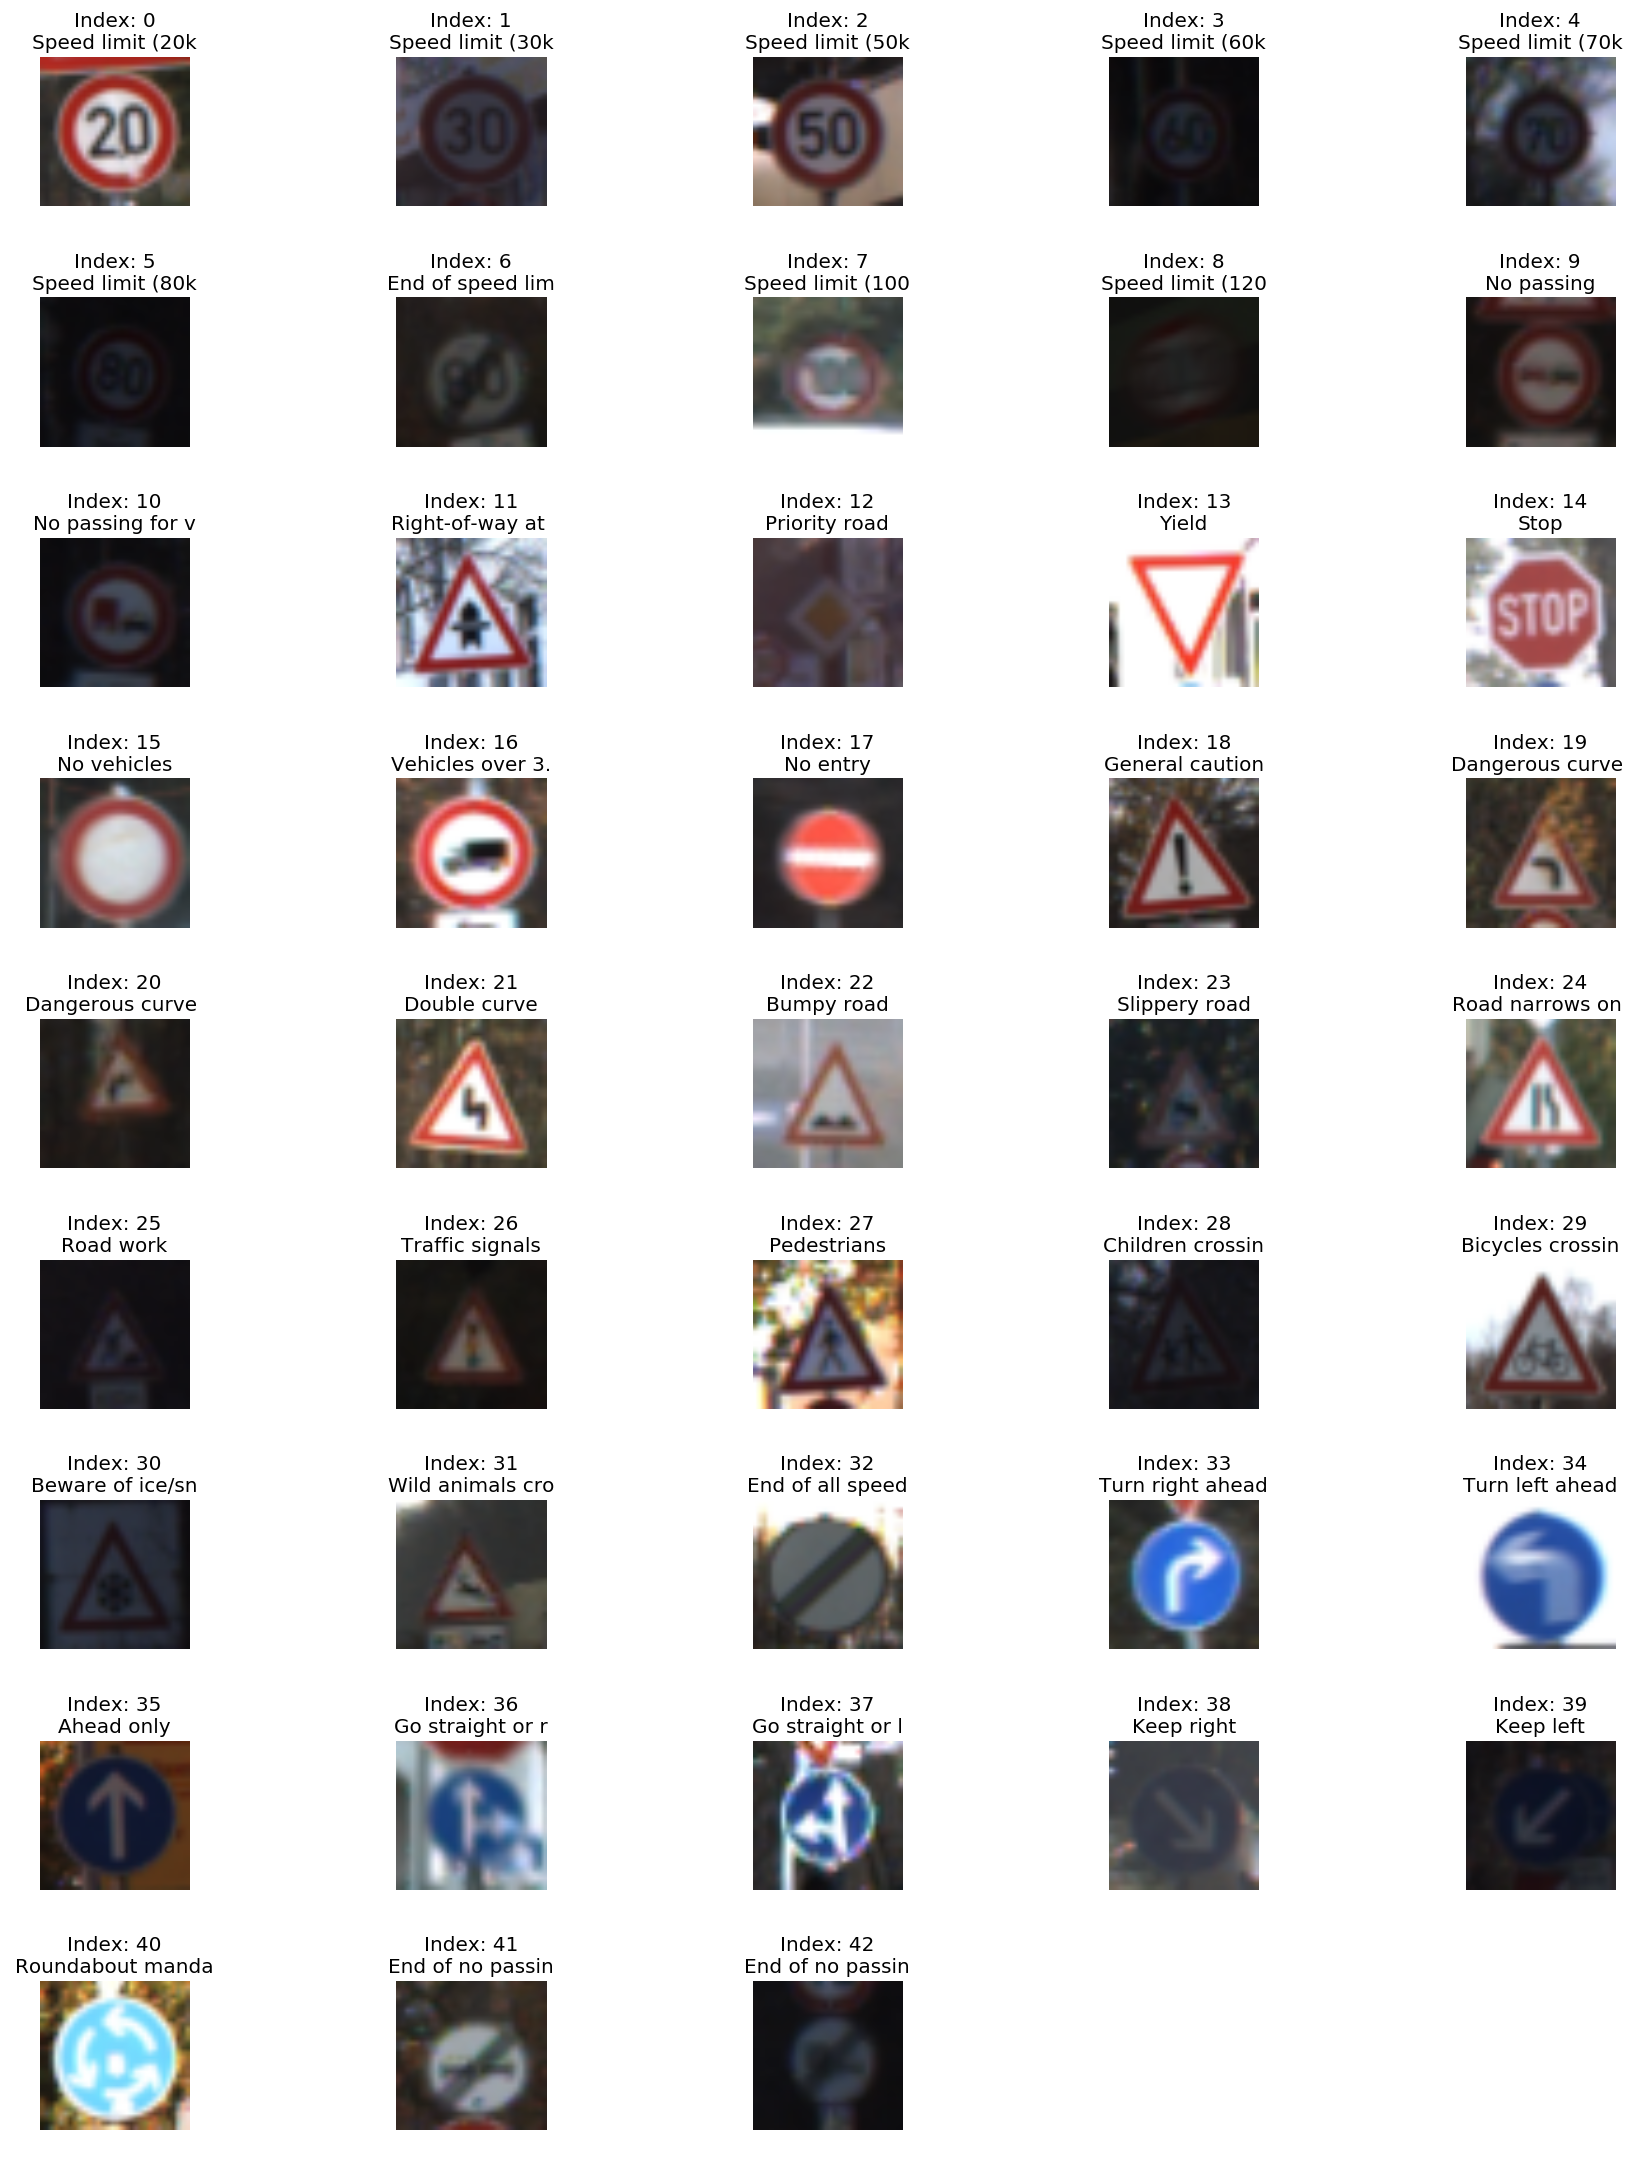

In [40]:
# Look at a random image from each class
train_label_cts = pd.Series(y_train).value_counts().sort_index()

plt.rcParams['savefig.dpi']=120.
plt.figure(figsize=(15, 20))
for i in range(n_classes):
    index = random.randint(0, train_label_cts[i]-1)
    target = X_train[y_train==i]
    sample = target[index]
    plt.subplot(10, 5, i+1)
    plt.title("Index: {}\n{}".format(i, targets.iloc[i].SignName[:16]))
    plt.axis('off')
    plt.imshow(sample, cmap="gray")
plt.tight_layout()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Data Augmentation
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Source of below data augmentation is this post:  
https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3

The labels are unbalanced, so we will augment the training data with transformed images.


In [41]:
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

In [76]:
# augment the training data: brightness, jitter

def augment_brightness(image):
    ''' Randomly adjust an input image's brightness
    '''
    img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    
    img[:,:,2] = img[:,:,2] * random_bright
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    return img

def tranform_image(img, ang_range, shear_range, trans_range, brightness=0):
    ''' Generate new images using following arguments:
    1 - img: Input image
    2 - ang_range: Range of angles for rotation
    3 - shear_range: Range of values to apply affine transform
    4 - trans_range: Range of values to apply translations
    
    Parameters for transformation generated from rand uniform dist
    '''
    # Rotation
    
    
    # Translation
    
    
    # Shear
    
    
    # Brightness
    
    
    return img

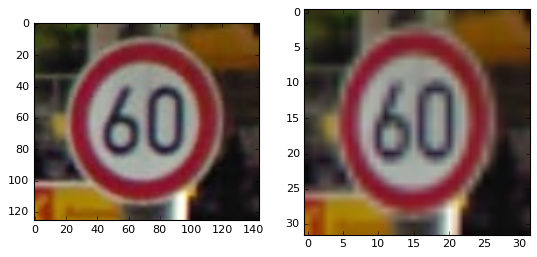

In [53]:
# look at a test image
plt.rcParams['savefig.dpi']=80.
image = mpimg.imread('./test_images/test-60km.png')
image_resized = cv2.resize(image, (32, 32))

gs = gridspec.GridSpec(1,2)
gs.update(wspace=.02, hspace=.02)  # set spacing b/w axes
plt.figure(figsize=(8,4))

ax = plt.subplot(gs[0])
plt.subplot(1,2,1)
plt.imshow(image)

ax = plt.subplot(gs[1])
plt.subplot(1,2,2)
plt.imshow(image_resized);

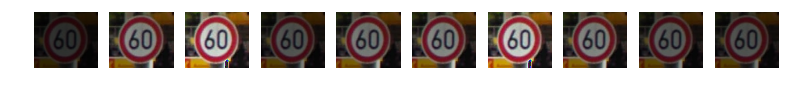

In [77]:
# look at brightness augmentation
gs1 = gridspec.GridSpec(1,10)
gs1.update(wspace=.01, hspace=.02)  # set spacing b/w axes
plt.figure(figsize=(12,4))

for i in range(10):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = augment_brightness(image)

    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Add training images

In [82]:
train_label_cts

0      180
1     1980
2     2010
3     1260
4     1770
5     1650
6      360
7     1290
8     1260
9     1320
10    1800
11    1170
12    1890
13    1920
14     690
15     540
16     360
17     990
18    1080
19     180
20     300
21     270
22     330
23     450
24     240
25    1350
26     540
27     210
28     480
29     240
30     390
31     690
32     210
33     599
34     360
35    1080
36     330
37     180
38    1860
39     270
40     300
41     210
42     210
dtype: int64

In [86]:
np.append(y_train, 99)

array([41, 41, 41, ..., 25, 25, 99])

In [87]:
len(y_train)

34799

In [88]:
len(np.append(y_train, 99))

34800

In [91]:
X_train.shape

(34799, 32, 32, 3)

In [97]:
np.concatenate((X_train, X_train[0:2]), axis=0).shape

(34801, 32, 32, 3)

In [103]:
np.ones(10, dtype=int)*12

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [109]:
# loop thru class labels and add images if <1000 instances
for i in range(n_classes):
    count = train_label_cts[i]
    if count  < 1000:
        target = X_train[y_train==i]
        num_add = 1000 - count
        list_add = []
        
        for j in range(num_add):
            index = random.randint(0, count-1)
            sample = target[index]
            list_add.append(augment_brightness(sample))
            
        X_train = np.concatenate((X_train, np.array(list_add)))
        y_train = np.append(y_train, np.ones(num_add, dtype=int) * i)

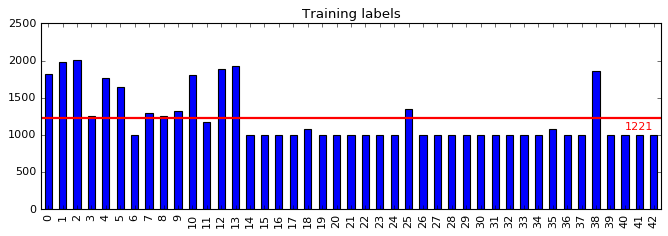

In [110]:
# look at augmented training data
plt.figure(figsize=(10,3))
pd.Series(y_train).value_counts().sort_index(ascending=True).plot('bar')
plt.axhline(y=len(y_train)/43, linewidth=2, color='r')
bal = int(y_train.shape[0]/43)
plt.text(40,bal-150, str(bal), color='r')
plt.title('Training labels');

### Pre-process the Data Set (normalization, grayscale, etc.)

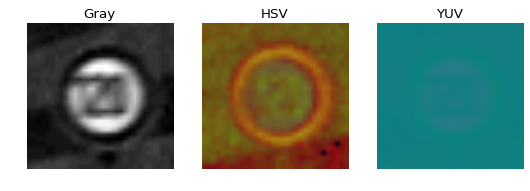

In [76]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

# look at different color transforms
plt.rcParams['savefig.dpi']=80.
plt.figure(figsize=(8, 3))

plt.subplot(131)
plt.title('Gray')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

plt.subplot(132)
plt.title('HSV')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(img, cmap="gray");

plt.subplot(133)
plt.title('YUV')
plt.axis('off')
img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
plt.imshow(img, cmap="gray");

In [111]:
### Grayscale the images
X_train_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_train]).reshape(-1, 32, 32, 1)
X_valid_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_valid]).reshape(-1, 32, 32, 1)
X_test_gray = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X_test]).reshape(-1, 32, 32, 1)

X_train_gray.shape

(52510, 32, 32, 1)

In [111]:
### Normalize the images
#X_train_norm = (X_train - (255/2)) / 255
#X_valid_norm = (X_valid - (255/2)) / 255
#X_test_norm = (X_test - (255/2)) / 255

X_train_norm = (X_train) / 255
X_valid_norm = (X_valid) / 255
X_test_norm = (X_test) / 255

print(X_train_norm.shape)
print(X_train_norm[0,:,:,0])

(34799, 32, 32, 3)
[[ 0.10980392  0.10588235  0.10588235 ...,  0.1254902   0.12156863
   0.12156863]
 [ 0.11372549  0.10588235  0.10588235 ...,  0.1254902   0.12156863
   0.11764706]
 [ 0.10980392  0.10588235  0.10196078 ...,  0.1254902   0.12156863
   0.11764706]
 ..., 
 [ 0.10588235  0.10980392  0.11764706 ...,  0.10588235  0.10980392
   0.11372549]
 [ 0.10980392  0.11372549  0.12156863 ...,  0.10588235  0.10980392
   0.10980392]
 [ 0.11372549  0.11764706  0.1254902  ...,  0.10588235  0.10588235
   0.10196078]]


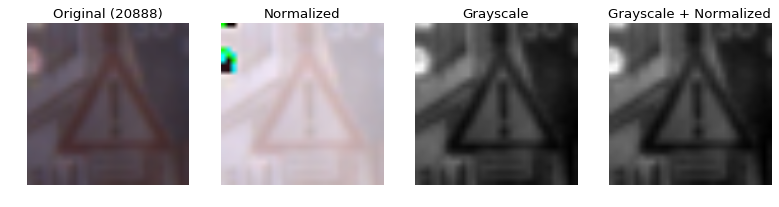

In [163]:
# Look at some normalized images
plt.rcParams['savefig.dpi']=80.
plt.figure(figsize=(12, 3))

index = random.randint(0, len(X_train))
plt.subplot(141)
plt.title('Original ({})'.format(index))
plt.axis('off')
plt.imshow(X_train[index])

plt.subplot(142)
plt.title('Normalized')
plt.axis('off')
plt.imshow(X_train_norm[index])

plt.subplot(143)
plt.title('Grayscale')
plt.axis('off')
img = cv2.cvtColor(X_train[index], cv2.COLOR_RGB2GRAY)
plt.imshow(X_train_gray[index][:,:,0], cmap='gray');

plt.subplot(144)
plt.title('Grayscale + Normalized')
plt.axis('off')
plt.imshow((img-255/2) / 255, cmap='gray');

In [112]:
### Normalize the grayscale images
X_train_norm = (X_train_gray - (255/2)) / 255
X_valid_norm = (X_valid_gray - (255/2)) / 255
X_test_norm = (X_test_gray - (255/2)) / 255

print(X_train_norm.shape)
print(X_train_norm[0,:,:,0])

(52510, 32, 32, 1)
[[-0.39803922 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 [-0.39411765 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 [-0.39411765 -0.40196078 -0.40196078 ..., -0.38627451 -0.39019608
  -0.39019608]
 ..., 
 [-0.40196078 -0.39803922 -0.39803922 ..., -0.40196078 -0.40196078
  -0.39803922]
 [-0.40588235 -0.40196078 -0.39411765 ..., -0.40196078 -0.40196078
  -0.40196078]
 [-0.40196078 -0.39803922 -0.39803922 ..., -0.40196078 -0.40588235
  -0.40980392]]


### Model Architecture

In [113]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32 x 32 x num_channels. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_channels, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x5. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    
    logits = fc3
    
    return logits

### Train, Validate and Test the Model

In [114]:
# Create features and labels
num_channels = 1  # adjust for number of color channels
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))  # adjust for image channels
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [115]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [116]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Load previous results

In [117]:
# load past results
df_results = pd.read_csv('models/results_dict.csv', header=None)
df_results

,0,1,2
0,NaN,0,1.000000
1,0.0,GRAY_epoch10_batch128,0.891000
2,1.0,GRAY_epoch1_batch128,0.769000
3,2.0,RGB_epoch10_batch128,0.906572
4,3.0,RGB_epoch1_batch128,0.714000
5,4.0,Gray_epoch2_batch128,0.753286
6,5.0,RGB_epoch2_batch128,0.776643


In [118]:
EPOCHS = 1
BATCH_SIZE = 128
cspace = 'Gray'

### Train the model

In [119]:
# run model and save results to dict

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_, y_train_ = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #results_dict['{}_epoch{}_batch{}'.format(cspace, EPOCHS, BATCH_SIZE)] = [test_accuracy, cspace, EPOCHS, BATCH_SIZE]
    df_results = df_results.append([('{}_epoch{}_batch{}'.format(cspace, EPOCHS, BATCH_SIZE), test_accuracy)], ignore_index=True)
    
    saver.save(sess, 'models/{}-{}-{}'.format(cspace, EPOCHS, BATCH_SIZE))
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.819

Test Accuracy = 0.792
Model saved


In [120]:
# look at saved results
df_results

,0,1,2
0,NaN,0,1.000000
1,0,GRAY_epoch10_batch128,0.891000
2,1,GRAY_epoch1_batch128,0.769000
3,2,RGB_epoch10_batch128,0.906572
4,3,RGB_epoch1_batch128,0.714000
5,4,Gray_epoch2_batch128,0.753286
6,5,RGB_epoch2_batch128,0.776643
7,Gray_epoch1_batch128,0.792003,NaN


In [121]:
# save the results
df_results.to_csv('models/results_dict.csv', header=False)

### Look at test results

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
# TODO: confusion matrix of test results


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- Image normalization.
- Tried grayscaling, then HSV transform.


In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- Augmented dataset with additional images to achieve balanced numbers of each target class.
- Added some image rotation, reversal, brightness, ...
- Split the training data into 80% train & 20% validation with stratified sets.


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Looks like LeNet...


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 10
BATCH_SIZE = 128


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used LeNet.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Looked up LeNet performance on ImageNet data.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Many are bright or dark. Background image content/noise.


In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

I got 3 of 5 signs correct.


In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

---
### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Speed limit signs are confusing. Perhaps we need to train on numbers with a sliding box.


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

The visual output...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 